In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from scipy import stats
from sklearn.model_selection import train_test_split, StratifiedKFold
from src.utils.constants import FEATURES_NAMES
from src.visualization.styles.formatting import errorbar_kwargs

In [2]:
random_state = 13

folder_path = os.path.join("data", "processed", "experimental")
samples = pd.read_csv(os.path.join(folder_path, "dataset.csv"))

ks = [2, 3, 4, 5, 10]
mu_train_valid = []
std_error_train_valid = []
mu_train_test = []
std_error_train_test = []
for k_folds in ks:
    skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=random_state)
    samples = samples.sample(frac=1, ignore_index=True, random_state=random_state)

    wasserstein_train_valid = []
    wasserstein_train_test = []
    for i, (train_idx, test_idx) in enumerate(skf.split(samples, samples["class"])):
        train_data = samples.loc[train_idx, FEATURES_NAMES[:-2]]
        test_data = samples.loc[test_idx, :]

        valid_data, test_data = train_test_split(
            test_data,
            test_size=0.5,
            random_state=random_state,
            stratify=test_data["class"],
        )

        valid_data = valid_data.loc[:, FEATURES_NAMES[:-2]]
        test_data = test_data.loc[:, FEATURES_NAMES[:-2]]

        wasserstein_train_valid.append(stats.wasserstein_distance_nd(train_data.values, valid_data.values))
        wasserstein_train_test.append(stats.wasserstein_distance_nd(train_data.values, test_data.values))

    wasserstein_train_valid = np.array(wasserstein_train_valid)
    wasserstein_train_test = np.array(wasserstein_train_test)

    print(f"Stratified {k_folds}-Fold CV")
    print(f"Train: {train_data.shape[0]} | Valid: {valid_data.shape[0]} | Test: {test_data.shape[0]}")
    mu = np.mean(wasserstein_train_valid)
    std_error = np.std(wasserstein_train_valid) / np.sqrt(len(wasserstein_train_valid) - 1)
    print(f"Wasserstein distance between train and valid: {mu:.2f} +/- {std_error:.2f}")
    mu_train_valid.append(mu)
    std_error_train_valid.append(std_error)

    mu = np.mean(wasserstein_train_test)
    std_error = np.std(wasserstein_train_test) / np.sqrt(len(wasserstein_train_test) - 1)
    print(f"Wasserstein distance between train and test: {mu:.2f} +/- {std_error:.2f}")
    mu_train_test.append(mu)
    std_error_train_test.append(std_error)
    print()

Stratified 2-Fold CV
Train: 222 | Valid: 111 | Test: 111
Wasserstein distance between train and valid: 4.84 +/- 0.24
Wasserstein distance between train and test: 3.93 +/- 0.31

Stratified 3-Fold CV
Train: 296 | Valid: 74 | Test: 74
Wasserstein distance between train and valid: 4.58 +/- 0.23
Wasserstein distance between train and test: 4.44 +/- 0.13

Stratified 4-Fold CV
Train: 333 | Valid: 55 | Test: 56
Wasserstein distance between train and valid: 4.72 +/- 0.29
Wasserstein distance between train and test: 5.16 +/- 0.19

Stratified 5-Fold CV
Train: 356 | Valid: 44 | Test: 44
Wasserstein distance between train and valid: 5.19 +/- 0.25
Wasserstein distance between train and test: 5.18 +/- 0.30

Stratified 10-Fold CV
Train: 400 | Valid: 22 | Test: 22
Wasserstein distance between train and valid: 6.11 +/- 0.32
Wasserstein distance between train and test: 6.48 +/- 0.34



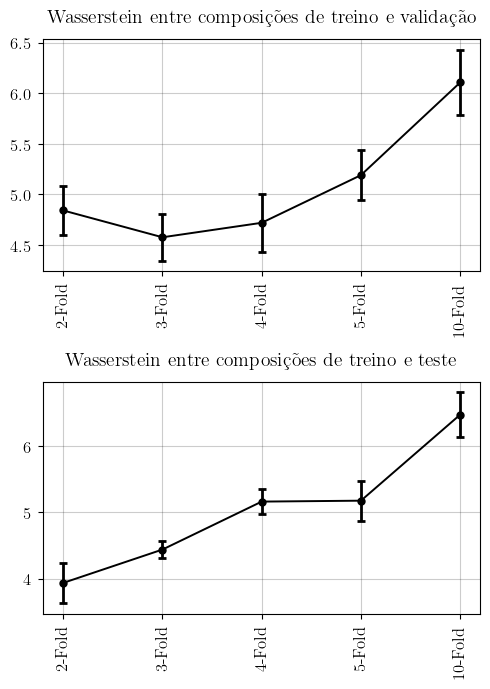

In [3]:
f, axs = plt.subplots(2, 1, figsize=(5, 7))
axs[0].errorbar([f"{k}-Fold" for k in ks], mu_train_valid, std_error_train_valid, **errorbar_kwargs)
axs[0].set_title("Wasserstein entre composições de treino e validação")
axs[1].errorbar([f"{k}-Fold" for k in ks], mu_train_test, std_error_train_test, **errorbar_kwargs)
axs[1].set_title("Wasserstein entre composições de treino e teste")
for ax in axs:
    ax.grid(True)
    ax.set_xticks([f"{k}-Fold" for k in ks], [f"{k}-Fold" for k in ks], rotation="vertical")
f.tight_layout()
plt.show()